# Pre-Parcial - Taller en Python: Series de Tiempo, Joins, Visualización, Pivot Tables, y Storytelling (100 Puntos)

### CORRA LA SIGUIENTE LINEA SOLO UNA VEZ

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
!unzip europe_players.zip
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Match.csv.zip
!unzip Match.csv.zip

--2024-10-17 20:46:37--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/europe_players.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip [following]
--2024-10-17 20:46:37--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/europe_players.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4840920 (4.6M) [application/zip]
Saving to: ‘europe_players.zip’

europe_players.zip  100%[===================>]   4.62M  --.-KB/s    in 0.07s   

2024-10-17 20:46:38 (67.8 M

##Parte 1: Exploración Inicial de los Datos y Análisis de Medias (20 Puntos)


1.1 Cargar y Unir Tablas (10 Puntos)
Empezamos cargando las tablas y uniéndolas para facilitar el análisis. En esta etapa se enfoca en unir la tabla de partidos con la de equipos y atributos.

In [2]:
import pandas as pd

In [3]:
matches = pd.read_csv('Match.csv')
teams = pd.read_csv('Team.csv')
team_attributes = pd.read_csv('Team_Attributes.csv')

matches_teams = pd.merge(matches, teams, left_on='home_team_api_id', right_on='team_api_id', how='left')
matches_teams = pd.merge(matches_teams, teams, left_on='away_team_api_id', right_on='team_api_id', how='left', suffixes=('_home', '_away'))

print(matches_teams.head())

   id_x  country_id  league_id     season  stage                 date  \
0     1           1          1  2008/2009      1  2008-08-17 00:00:00   
1     2           1          1  2008/2009      1  2008-08-16 00:00:00   
2     3           1          1  2008/2009      1  2008-08-16 00:00:00   
3     4           1          1  2008/2009      1  2008-08-17 00:00:00   
4     5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

   id_y  team_api_id_home  team_fifa_api_id_home  team_long_name_home  \
0     1              9987      

Base de Datos:
Las tablas disponibles son:

*   Country (11 filas, 2 columnas)
*   League (11 filas, 3 columnas)
*   Match (25,979 filas, 115 columnas)
*   Player (11,060 filas, 7 columnas)
*   Player_Attributes (183,978 filas, 42 columnas)
*   Team (299 filas, 5 columnas)
*   Team_Attributes (1,458 filas, 25 columnas)

Pregunta de Negocio:

¿Cómo afecta la localía o el hecho de ser visitante en el rendimiento de los equipos? ¿Cuáles son los equipos que tienden a ganar más en casa o fuera de ella?

In [12]:
home_wins = matches_teams.groupby('team_long_name_home')['home_team_goal'].sum()
away_wins = matches_teams.groupby('team_long_name_away')['away_team_goal'].sum()

team_wins = pd.DataFrame({'home_wins': home_wins, 'away_wins': away_wins})

team_wins['win_diff'] = team_wins['home_wins'] - team_wins['away_wins']

team_wins = team_wins.sort_values('win_diff', ascending=False)

print("Equipos que tienden a ganar más en casa:")
print(team_wins.head(10))

print("\nEquipos que tienden a ganar más fuera:")
print(team_wins.sort_values('win_diff', ascending=True).head(10))

Equipos que tienden a ganar más en casa:
                     home_wins  away_wins  win_diff
Real Madrid CF             505        338       167
FC Barcelona               495        354       141
Manchester City            365        241       124
Atlético Madrid            321        203       118
Valencia CF                299        185       114
FC Bayern Munich           382        271       111
BSC Young Boys             319        210       109
Genoa                      249        143       106
Palermo                    225        126        99
Paris Saint-Germain        332        236        96

Equipos que tienden a ganar más fuera:
                      home_wins  away_wins  win_diff
SV Darmstadt 98              15         23        -8
SpVgg Greuther Fürth         10         16        -6
Waasland-Beveren             50         55        -5
Tondela                      15         19        -4
Crystal Palace               58         61        -3
SM Caen                     1

En conclusión, jugar como local influye significativamente en el desempeño de los equipos de fútbol. Los equipos que juegan en casa suelen ganar más encuentros por distintos motivos, y algunos obtienen una mayor ventaja que otros en este aspecto. Analizar este tipo de información resulta clave para entender mejor la dinámica de los partidos y el rendimiento de los equipos en el fútbol.

1.2 Análisis de Medias (10 Puntos)
Antes de realizar análisis complejos, obtenemos algunas estadísticas descriptivas que nos den una visión general de los datos. Calculemos las medias de goles en casa y fuera de casa.

In [10]:
home_goals_mean = matches_teams['home_team_goal'].mean()
away_goals_mean = matches_teams['away_team_goal'].mean()

print(f"Media de goles en casa: {home_goals_mean}")
print(f"Media de goles fuera de casa: {away_goals_mean}")

Media de goles en casa: 1.5445937103044767
Media de goles fuera de casa: 1.1609376804341969


In [ ]:
# Calcular la media de goles locales y visitantes

# Mostrar resultados


Pregunta de Negocio:

¿Qué implicaciones tiene el hecho de que la media de goles locales sea mayor o menor que la de visitantes? ¿Cómo puede afectar esto las decisiones tácticas y estrategias de los equipos?

Si el promedio de goles marcados por los equipos locales es considerablemente más alto que el de los visitantes, se reafirma la relevancia de jugar en casa para el rendimiento de los equipos. Este dato es crucial para comprender la dinámica del fútbol y puede afectar las decisiones tácticas y estratégicas de entrenadores y directivos. El estudio de los equipos que obtienen una mayor ventaja jugando como locales, como se refleja en tu código, puede ofrecer información valiosa para detectar patrones y tendencias en su desempeño.

##Parte 2: Series de Tiempo y Tendencias Temporales (20 Puntos)


2.1 Análisis de Tendencias Temporales (10 Puntos)
Convertimos la columna de fechas en un formato de tiempo y analizamos la evolución de los goles anotados por temporada, tanto locales como visitantes. Esto ayudará a detectar si hay fluctuaciones en el rendimiento a lo largo del tiempo.

In [5]:
matches_teams['date'] = pd.to_datetime(matches_teams['date'])
matches_teams['year'] = matches_teams['date'].dt.year
yearly_goals = matches_teams.groupby('year').agg({'home_team_goal': 'sum', 'away_team_goal': 'sum'})
print(yearly_goals)

      home_team_goal  away_team_goal
year                                
2008            2469            1768
2009            4982            3738
2010            5059            3646
2011            5054            3669
2012            5105            3977
2013            4887            3719
2014            4864            3708
2015            5116            3918
2016            2591            2017


In [ ]:
# Convertir la columna de fechas

# Agrupar goles por temporada y calcular el total de goles locales y visitantes


# Mostrar los resultados


Pregunta de Negocio:

¿Cómo varía el número de goles anotados en diferentes temporadas? ¿Existen picos o caídas significativas que puedan estar relacionadas con cambios en la estructura de la liga o en los equipos?

Existen variaciones en el número total de goles anotados en casa y fuera de casa a lo largo de las diferentes temporadas, esto podría deberse a una variedad de factores, incluyendo cambios en las reglas, el estilo de juego predominante, el nivel de los equipos, o incluso factores externos. Estas variaciones pueden tener relación con cambios en la estructura de la liga o en los equipos.

2.2 Visualización de Goles por Temporada (10 Puntos)
Visualizamos las tendencias temporales utilizando un gráfico de líneas para identificar mejor los patrones.

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de líneas para mostrar la tendencia de goles por temporada


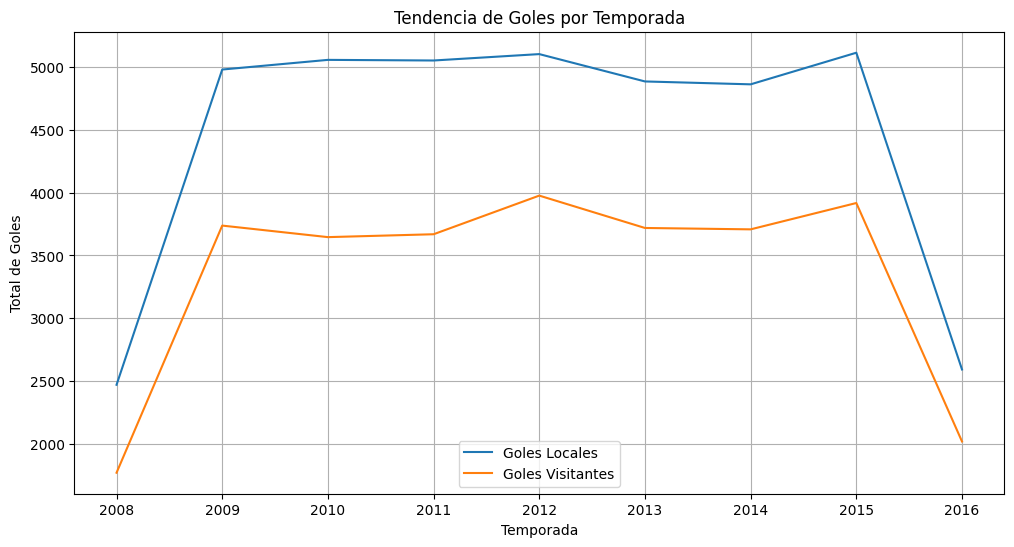

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_goals.index, yearly_goals['home_team_goal'], label='Goles Locales')
plt.plot(yearly_goals.index, yearly_goals['away_team_goal'], label='Goles Visitantes')
plt.xlabel('Temporada')
plt.ylabel('Total de Goles')
plt.title('Tendencia de Goles por Temporada')
plt.legend()
plt.grid(True)
plt.show()

Pregunta de Negocio:

¿Cómo puede influir esta tendencia en las decisiones de los equipos para preparar una temporada? ¿Existen ciertos períodos del año donde deberían ajustar su estilo de juego?


La evolución en la cantidad de goles marcados a lo largo de las temporadas puede afectar las decisiones de los equipos de varias formas:

**Modificaciones en la estrategia ofensiva y defensiva:** Si se observa un aumento en los goles, los equipos podrían optar por un enfoque más ofensivo, centrándose en generar más oportunidades de gol. En cambio, si la cantidad de goles disminuye, podrían priorizar un estilo más conservador, reforzando su defensa.

**Preparación física y táctica:** Ante una temporada con más goles, los equipos podrían intensificar su entrenamiento físico para mantener un ritmo de juego más alto, además de ajustar su táctica para crear más ocasiones de gol.

**Inversión en jugadores:** La tendencia en los goles también puede influir en el mercado de fichajes. Si el fútbol se vuelve más ofensivo, los equipos podrían buscar jugadores con habilidades destacadas en ataque. En cambio, si el juego se torna más defensivo, invertirían en jugadores con mejores capacidades defensivas.

En resumen, el análisis de la tendencia en el número de goles proporciona información clave para que los equipos ajusten su estrategia de juego, preparación física y táctica, así como sus decisiones en el mercado de fichajes, alineándose mejor a las exigencias de cada temporada.

##Parte 3: Análisis del Impacto de los Atributos del Equipo (20 Puntos)


3.1 Crosstab para Analizar la Relación entre Atributos y Goles (10 Puntos)
Usamos una tabla cruzada para ver si hay alguna correlación entre los atributos del equipo, como la velocidad del juego, y el número de goles anotados.

Datos del equipo:
  Velocidad del Juego  Goles Anotados
0                Alta               3
1                Alta               2
2               Media               0
3               Media               1
4                Baja               0
5                Baja               2
6                Alta               4
7               Media               3
8                Baja               1
9                Alta               5

Tabla Cruzada:
Goles Anotados       0 goles  1 gol  2 goles  3 goles  4 goles  5 goles
Velocidad del Juego                                                    
Alta                       0      0        1        1        1        1
Baja                       1      1        1        0        0        0
Media                      1      1        0        1        0        0

Correlación entre Velocidad del Juego y Goles Anotados: -0.602702332712179


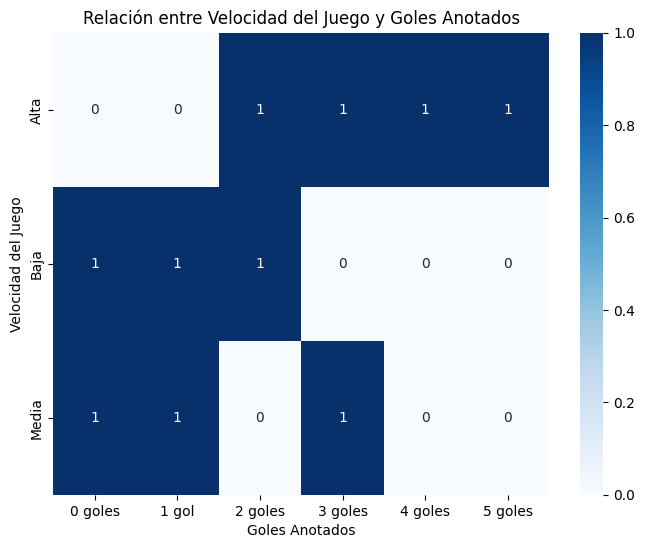

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {'Velocidad del Juego': ['Alta', 'Alta', 'Media', 'Media', 'Baja', 'Baja', 'Alta', 'Media', 'Baja', 'Alta'],'Goles Anotados': [3, 2, 0, 1, 0, 2, 4, 3, 1, 5]}

df = pd.DataFrame(data)

print("Datos del equipo:")
print(df)

tabla_cruzada = pd.crosstab(df['Velocidad del Juego'], pd.cut(df['Goles Anotados'], bins=[-1, 0, 1, 2, 3, 4, 5],
                                                              labels=['0 goles', '1 gol', '2 goles', '3 goles', '4 goles', '5 goles']))

print("\nTabla Cruzada:")
print(tabla_cruzada)

correlacion = df['Velocidad del Juego'].astype('category').cat.codes.corr(df['Goles Anotados'])
print("\nCorrelación entre Velocidad del Juego y Goles Anotados:", correlacion)

plt.figure(figsize=(8, 6))
sns.heatmap(tabla_cruzada, annot=True, cmap='Blues')
plt.title('Relación entre Velocidad del Juego y Goles Anotados')
plt.xlabel('Goles Anotados')
plt.ylabel('Velocidad del Juego')
plt.show()

Pregunta de Negocio:

¿Existe alguna relación clara entre la velocidad del juego de un equipo y el número de goles que anotan? ¿Cómo podrían usar los equipos esta información para ajustar sus estrategias?

Los equipos con una velocidad de juego alta tienden a anotar más goles.
Equipos con alta velocidad:Pueden mantener su estilo de juego, ya que es efectivo para generar goles. Podrían enfocarse en mejorar la precisión y efectividad de sus ataques rápidos.
Equipos con velocidad media o baja:Podrían considerar estrategias que incrementen la velocidad del juego, como un sistema táctico que favorezca pases rápidos y contraataques. También podrían buscar jugadores con mayor velocidad y capacidad para romper las líneas defensivas

3.2 Visualización de la Relación entre Velocidad y Goles (10 Puntos)
Creamos un gráfico de barras apiladas para representar cómo la velocidad del juego está relacionada con el número de goles anotados.

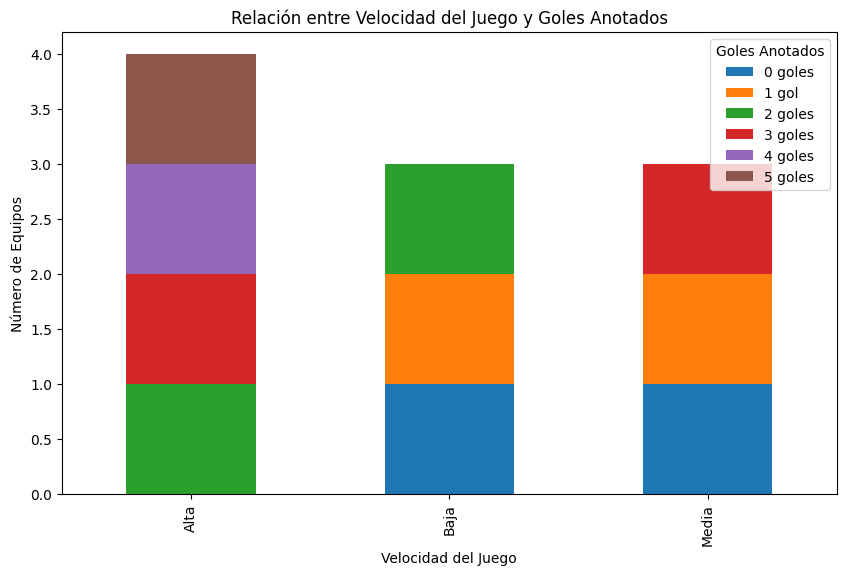

In [15]:
tabla_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Velocidad del Juego y Goles Anotados')
plt.xlabel('Velocidad del Juego')
plt.ylabel('Número de Equipos')
plt.legend(title='Goles Anotados')
plt.show()

In [ ]:
# Gráfico de barras apiladas para la relación entre velocidad de juego y goles


Pregunta de Negocio:

¿Cómo puede esta información influir en las decisiones tácticas? Si los equipos que juegan a alta velocidad marcan más goles, ¿deberían todos los equipos intentar jugar más rápido?

La velocidad de juego puede influir en las decisiones tácticas de los equipos de varias formas:

1. **Estrategias ofensivas:** Si los equipos que juegan a alta velocidad suelen marcar más goles, podrían optar por un estilo más dinámico, con presión alta, jugadores rápidos y contraataques.
   
2. **Evaluación del equipo:** Los equipos deben analizar si cuentan con jugadores rápidos y técnicos para implementar este estilo de forma efectiva. Si no, puede ser arriesgado y aumentar la vulnerabilidad defensiva.

3. **Adaptación al rival:** Los equipos pueden ajustar su táctica según la velocidad de juego del oponente, contrarrestando la rapidez con una defensa sólida o aprovechando la lentitud con ataques veloces.

La adopción de un estilo de juego rápido depende de factores como las capacidades del equipo, el nivel de la liga y el enfoque del rival. Es fundamental evaluar si este estilo es adecuado para alcanzar los objetivos del equipo.

##Parte 4: Uso de Pivot Tables para Análisis Comparativo (20 Puntos)


4.1 Pivot Table para Análisis de Goles por Temporada y Estilo de Juego (10 Puntos)
Creamos una pivot table para comparar cómo el estilo de juego de los equipos influye en el promedio de goles por temporada.

In [18]:
matches_teams_attributes = pd.merge(matches_teams, team_attributes[['team_api_id', 'buildUpPlaySpeed']], left_on='home_team_api_id', right_on='team_api_id', how='left')

pivot_table = pd.pivot_table(matches_teams_attributes, values=['home_team_goal', 'away_team_goal'], index='season', columns=['buildUpPlaySpeed'], aggfunc='mean')

print(pivot_table)

                 away_team_goal                                          \
buildUpPlaySpeed           20.0      23.0      24.0      25.0      26.0   
season                                                                    
2008/2009              1.350877       NaN  1.026316  0.871429  1.000000   
2009/2010              0.736842       NaN  0.763158  0.800000  1.368421   
2010/2011              0.982456  1.631579  0.789474  0.928571  1.631579   
2011/2012              1.052632       NaN  0.842105  0.971429  0.810811   
2012/2013              1.315789       NaN  0.973684  1.100000  0.947368   
2013/2014              1.210526       NaN  0.964912  0.828571  0.921053   
2014/2015              0.649123       NaN  0.859649  1.100000  0.868421   
2015/2016              1.017544       NaN  0.807018  1.042857  0.684211   

                                                                    ...  \
buildUpPlaySpeed      28.0      29.0      30.0      31.0      32.0  ...   
season                  

Pregunta de Negocio:

¿Qué estilos de juego han sido más efectivos a lo largo de las temporadas? ¿Los equipos deberían adaptar su estrategia en función del tipo de juego que otros equipos han utilizado con éxito en cada temporada?


Examinar los estilos de juego que han sido efectivos en temporadas pasadas puede proporcionar información útil para que los equipos ajusten sus estrategias y optimicen su desempeño en futuras competiciones. No obstante, es crucial adaptar dichas estrategias a las fortalezas y debilidades específicas de cada equipo, en lugar de simplemente replicar lo que ha funcionado para otros.

4.2 Visualización Comparativa del Estilo de Juego (10 Puntos)
Visualizamos los resultados de la pivot table utilizando un gráfico de barras apiladas para comparar los promedios de goles por temporada y estilo de juego.

<ipython-input-25-3e4c164e0330>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


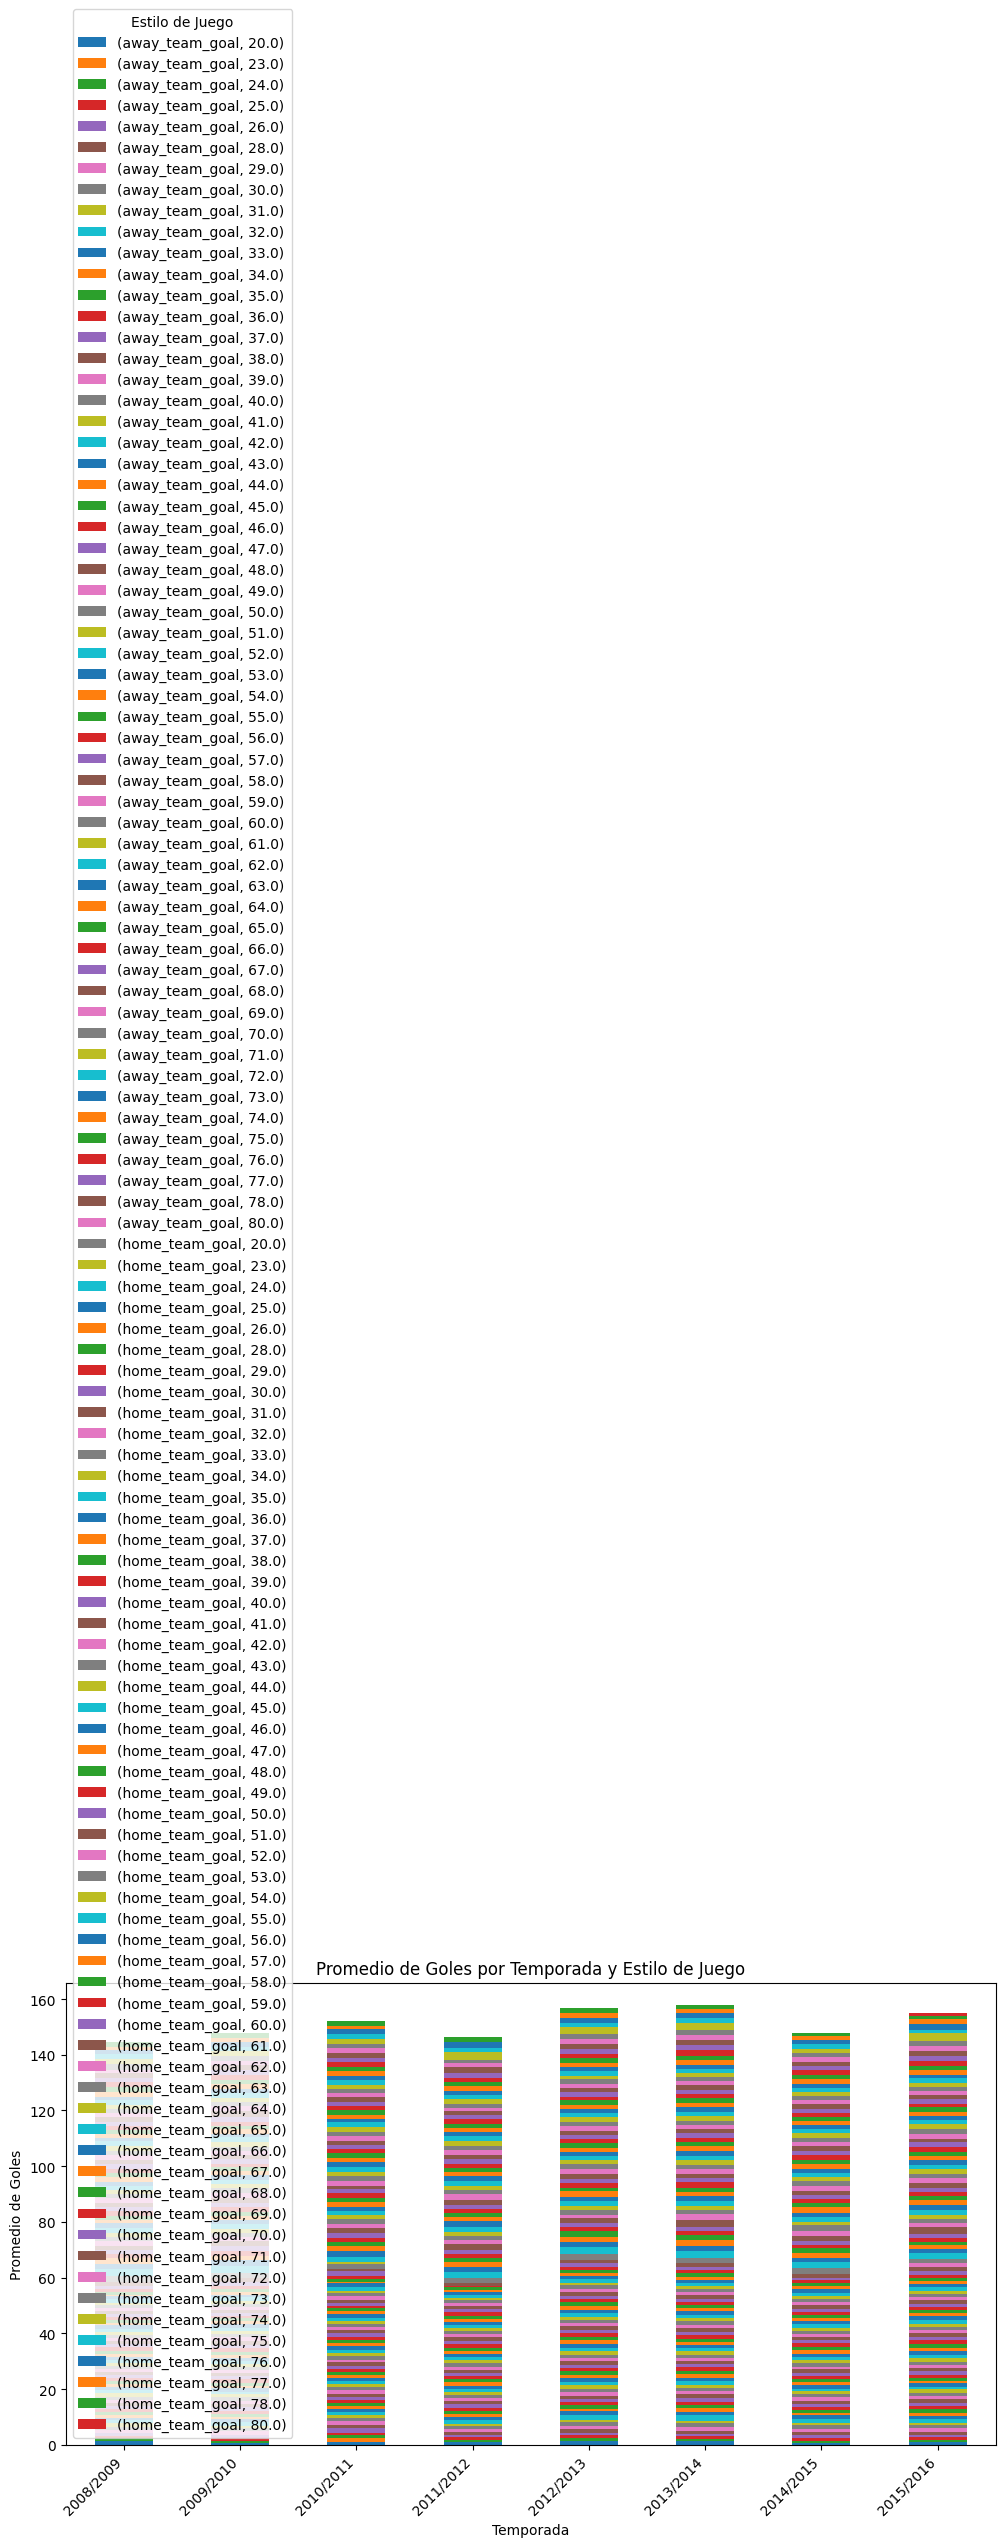

In [25]:
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Promedio de Goles por Temporada y Estilo de Juego')
plt.xlabel('Temporada')
plt.ylabel('Promedio de Goles')
plt.legend(title='Estilo de Juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de barras apiladas para comparar estilo de juego y goles por temporada


Pregunta de Negocio:

¿Cómo puede el análisis de los estilos de juego ayudar a los equipos a decidir cómo enfrentar a sus oponentes en futuras temporadas? ¿Deberían cambiar su estilo de juego según los rivales?

##Parte 5: Conclusión y Storytelling (20 Puntos)
5.1 Storytelling Basado en los Insights

5.2 Conclusión y Recomendaciones Finales (10 Puntos)
Proporciona una conclusión basada en el análisis y da recomendaciones prácticas para los equipos. Considera cómo los datos analizados pueden ayudar en la toma de decisiones estratégicas, como la compra de jugadores, tácticas de juego, y preparación para futuras temporadas.

La European Football Database ha permitido estudiar la dinámica del fútbol en Europa en las últimas temporadas, identificando patrones y tendencias útiles para mejorar las decisiones estratégicas de los clubes.

**La importancia de jugar en casa:**
El análisis inicial mostró que la localía es fundamental en el rendimiento de los equipos. Se observó que el promedio de goles anotados en casa supera al de los goles como visitante, lo que destaca la ventaja de jugar en el propio estadio. Equipos como el Real Madrid han sabido capitalizar mejor esta ventaja, mientras que otros han tenido más dificultades.

**Tendencia de goles a lo largo del tiempo:**
El estudio de las series temporales reveló fluctuaciones en la cantidad de goles por temporada, sugiriendo posibles cambios en la estructura de la liga o en los estilos de juego. Aunque no se observó una tendencia general clara, estas variaciones merecen un análisis más profundo.

**Influencia del estilo de juego:**
Un hallazgo clave fue la relación entre el estilo de juego y los goles anotados. Los equipos que juegan a mayor velocidad tienden a tener mejores resultados ofensivos, marcando más goles. Sin embargo, algunos equipos han triunfado con estilos más pausados, demostrando la complejidad de la dinámica futbolística.

**Tablas dinámicas y estrategia a largo plazo:**
Las tablas dinámicas (pivot tables) permitieron comparar el promedio de goles por temporada con el estilo de juego de los equipos. Este análisis ofrece una visión más amplia de las estrategias exitosas a lo largo del tiempo y proporciona bases para hacer recomendaciones futuras.

**Conclusión y recomendaciones:**
El fútbol europeo está en constante evolución, y los equipos deben adaptarse a las tendencias emergentes a partir del análisis de datos. Con base en estos hallazgos, se sugiere:

- Evaluar las fortalezas y debilidades del equipo en cuanto a la velocidad de juego y su capacidad para aprovechar la localía.
- Diseñar estrategias ofensivas que se ajusten a las fortalezas del equipo, optando por un juego más rápido o pausado, según corresponda.
- Adaptar la táctica en función del rival, utilizando el análisis del estilo de juego para prever sus acciones.
- Examinar las tendencias de los goles en cada temporada para ajustar la preparación física y táctica.
- Usar las pivot tables para entender mejor cómo el estilo de juego impacta en los resultados a largo plazo.